In [ ]:
# Instalacion de dependencias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración para los graficos
plt.rcParams["figure.figsize"] = (10, 5)
sns.set_theme(style="whitegrid")

## Carga de datos

Se cargan los resultados obtenidos de `evaluate.py`, para luego crear una columna que indique el LLM correspondiente para la unificacion de los DataFrame. 

In [5]:
df_chatgpt = pd.read_csv("results_chatgpt.csv")
df_deepseek = pd.read_csv("results_deepseek.csv")

df_chatgpt["provider"] = "ChatGPT"
df_deepseek["provider"] = "DeepSeek"

df = pd.concat([df_chatgpt, df_deepseek], ignore_index=True)

In [ ]:
#Tabla Comparativa
metrics = df.groupby("provider").agg({
    "em": "mean",
    "sim": "mean",
    "latency_total": "mean",
    "latency_retrieve": "mean",
    "latency_llm": "mean",
    "cost_usd": ["mean", "sum"]
}).round(4)

print("=== Métricas agregadas ===")
display(metrics)

=== Métricas agregadas ===


em     sim latency_total latency_retrieve latency_llm cost_usd  \
         mean    mean          mean             mean        mean     mean   
provider                                                                    
ChatGPT   0.0  0.7176        3.3971           0.0118      3.3853   0.0010   
DeepSeek  0.0  0.6678       11.9619           0.0119     11.9500   0.0008   

                  
             sum  
provider          
ChatGPT   0.0190  
DeepSeek  0.0143

# Comparativa de EM (Exact Match) y Similitud Coseno

En esta seccion se compara la Coincidencia Exacta y la Similitud del Coseno, dado que las respuestas obtenidas por los LLM no es igual a la respuesta esperada en el gold_set todas las puntuaciones de EM son 0, aunque analizando el conjunto de datos de ambos provedores se puede observar que ambos tienen respuestas acordes al contexto.

Por parte de la Similitud del Coseno, ChatGPT presenta una mayor similitud con las repuestas generadas respecto a la respuesta de referencia teniendo un diferencia de 0.05 puntos de diferencia aprox. Pero en ambos provedores presenta una buena coincidencia semántica en las respuestas.

C:\Users\ignac\AppData\Local\Temp\ipykernel_17968\2145066062.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="provider", y="em", ax=axes[0], ci=None)
C:\Users\ignac\AppData\Local\Temp\ipykernel_17968\2145066062.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="provider", y="sim", ax=axes[1], ci=None)


Text(0, 0.5, 'Similitud')

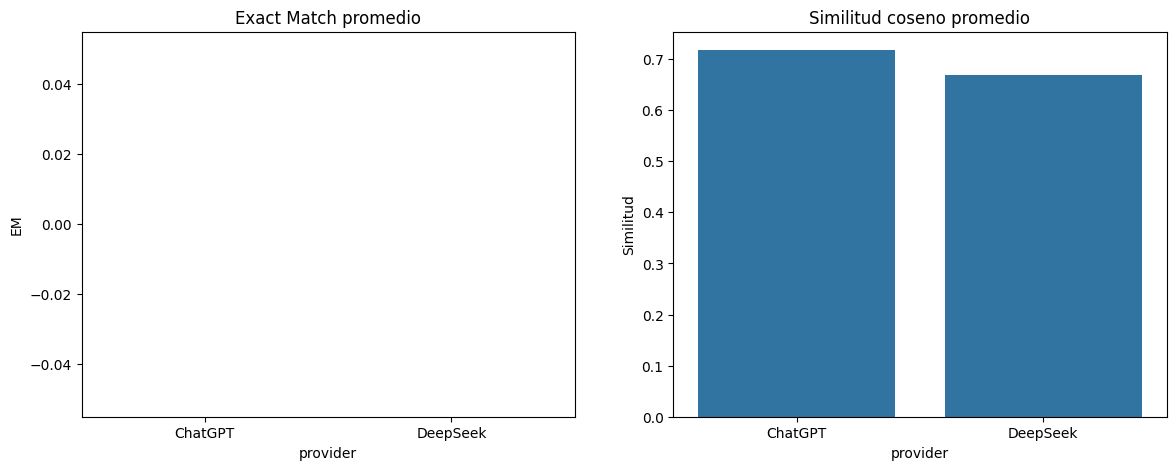

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=df, x="provider", y="em", ax=axes[0], ci=None)
axes[0].set_title("Exact Match promedio")
axes[0].set_ylabel("EM")

sns.barplot(data=df, x="provider", y="sim", ax=axes[1], ci=None)
axes[1].set_title("Similitud coseno promedio")
axes[1].set_ylabel("Similitud")

# Comparacion de Latencia

En el grafico de caja y bigote se puede observar una clara diferencia en la respuesta en la velocidad y consistencia entre ChatGPT y DeepSeek. Siendo GPT el modelo con mayor velocidad y consistencia en los tiempos de respuestas, dado que el 50% de las consultas se respondieron aproximadamente en 3 segundos, ademas de presentar poca variabilidad en los tiempos de respuesta. A diferencia de DeepSeek el cual tarda aproximadamente 12 segundos y los tiempos varian bastante con respecto a la mediana.

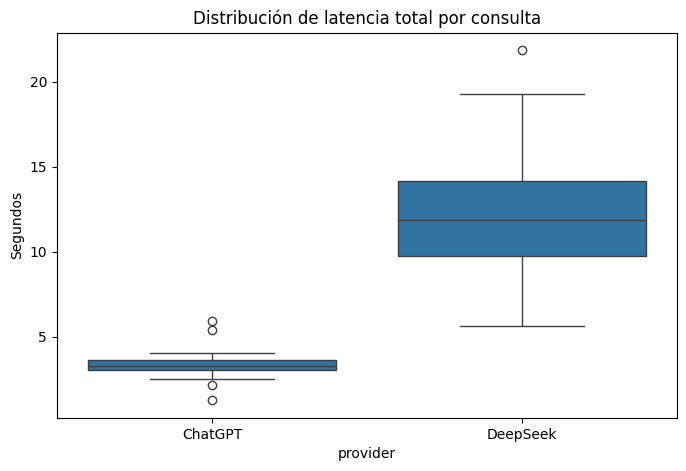

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="provider", y="latency_total")
plt.title("Distribución de latencia total por consulta")
plt.ylabel("Segundos")
plt.show()

# Comparacion de Costo

Si bien la diferencia entre ambos proveedores es de unos $0.004 dolares, Deepseek se presenta como el modelo mas barato a comparacion con ChatGPT.

C:\Users\ignac\AppData\Local\Temp\ipykernel_17968\2510273558.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="provider", y="cost_usd", estimator=sum, ci=None)


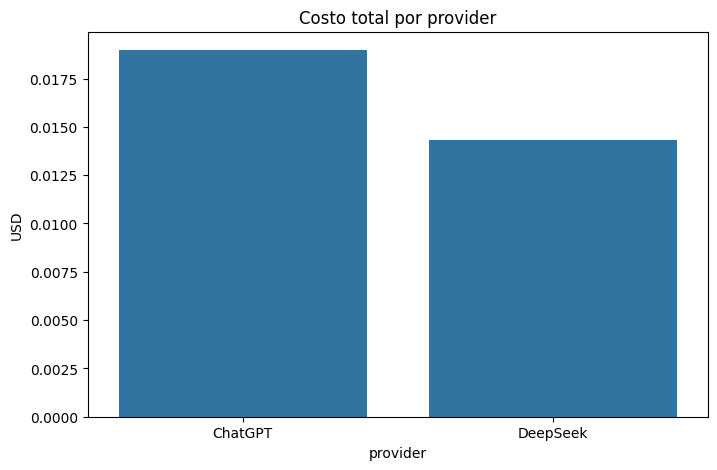

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="provider", y="cost_usd", estimator=sum, ci=None)
plt.title("Costo total por provider")
plt.ylabel("USD")
plt.show()